## Walmart_Case_Study

Name - Sanjesh Chourasia.







## About Walmart
Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

## Business Problem

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

In [ ]:
# Importing libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as norm
import scipy.stats as poisson
import scipy.stats as binom
import scipy.stats as stats
import math

# reading csv file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading data.
df = pd.read_csv('/content/drive/My Drive/Scaler case study/Walmart_Case_Study/walmart_data.txt')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
# Shape of data
df.shape

(550068, 10)

Data has 550068 rows and 10 columns.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [ ]:
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


Out Data contain zero null value.

In [ ]:
# Changing data type of ['Occupation','Marital_Status','Product_Category] columns.
columns = ['Occupation','Marital_Status','Product_Category']
df[columns] = df[columns].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 42.0+ MB


In [ ]:
df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.0,550068,550068,550068.0,550068.0,550068.000000
unique,NaN,3631,2,7,21.0,3,5,2.0,20.0,NaN
top,NaN,P00265242,M,26-35,4.0,B,1,0.0,5.0,NaN
freq,NaN,1880,414259,219587,72308.0,231173,193821,324731.0,150933.0,NaN
mean,1.003029e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9263.968713
std,1.727592e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5023.065394
min,1.000001e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000
25%,1.001516e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12054.000000


From above table we can say that-
1. Majorty of out customer are male.
2. Customers with age group 26-35 are our potiantioal customer.
3. Avarage purchase amount is 9263.96.
4. Top city is from category B.

## Non-Graphical Analysis: Value counts and unique attribute

In [ ]:
# unique product id
unique_product_id = df['Product_ID'].nunique()
print('Total no of unique product id:',unique_product_id)

# unique gender
unique_gender = df['Gender'].nunique()
print('Total no of unique gender:',unique_gender)

# Occupation
unique_Occupation = df['Occupation'].nunique()
print('Total no of unique Occupation:',unique_Occupation)

# City_Category
unique_City_Category = df['City_Category'].nunique()
print('Total no of unique City_Category:',unique_City_Category)

# Stay_In_Current_City_Years
unique_Stay_In_Current_City_Years = df['Stay_In_Current_City_Years'].nunique()
print('Total no of unique Stay_In_Current_City_Years:',unique_Stay_In_Current_City_Years)

# Marital_Status
unique_Marital_Status = df['Marital_Status'].nunique()
print('Total no of unique Marital_Status:',unique_Marital_Status)

# Product_Category
unique_Product_Category = df['Product_Category'].nunique()
print('Total no of unique Product_Category:',unique_Product_Category)

Total no of unique product id: 3631
Total no of unique gender: 2
Total no of unique Occupation: 21
Total no of unique City_Category: 3
Total no of unique Stay_In_Current_City_Years: 5
Total no of unique Marital_Status: 2
Total no of unique Product_Category: 20


In [ ]:
gender = df['Gender'].value_counts()
gender.reset_index()

,Gender,count
0,M,414259
1,F,135809


In [ ]:
# Distribution base on gender.
gender_dis = (df['Gender'].value_counts()/len(df))*100.
gender_dis.reset_index()

,Gender,count
0,M,75.310507
1,F,24.689493


1. 75.3% of population are male and 24.68% are female

In [ ]:
# Distribution base on Age.
Age_dis = (df['Age'].value_counts()/len(df))*100.
Age_dis.reset_index()

,Age,count
0,26-35,39.919974
1,36-45,19.999891
2,18-25,18.117760
3,46-50,8.308246
4,51-55,6.999316
5,55+,3.909335
6,0-17,2.745479


We can also say that the data is divided into groups based on age. About 39.9% of the population is aged 26–35, 19.9% falls within the 36–45 range, and only 5% of the population is in the 0–17 and 55+ age groups.

In [ ]:
# City_Category
city_category_dis = (df['City_Category'].value_counts()/len(df))*100.
city_category_dis.reset_index()

,City_Category,count
0,B,42.026259
1,C,31.118880
2,A,26.854862



The data is divided into three categories (A, B, and C). About 42% of our customers are from city category B, 31% are from category C, and 26% are from category A.

In [ ]:
# Marital_Status
Marital_Status_dis = (df['Marital_Status'].value_counts()/len(df))*100.
Marital_Status_dis.reset_index()

,Marital_Status,count
0,0,59.034701
1,1,40.965299



60% of users are single, and 40% are married

## Visual Analysis - Univariate & Bivariat


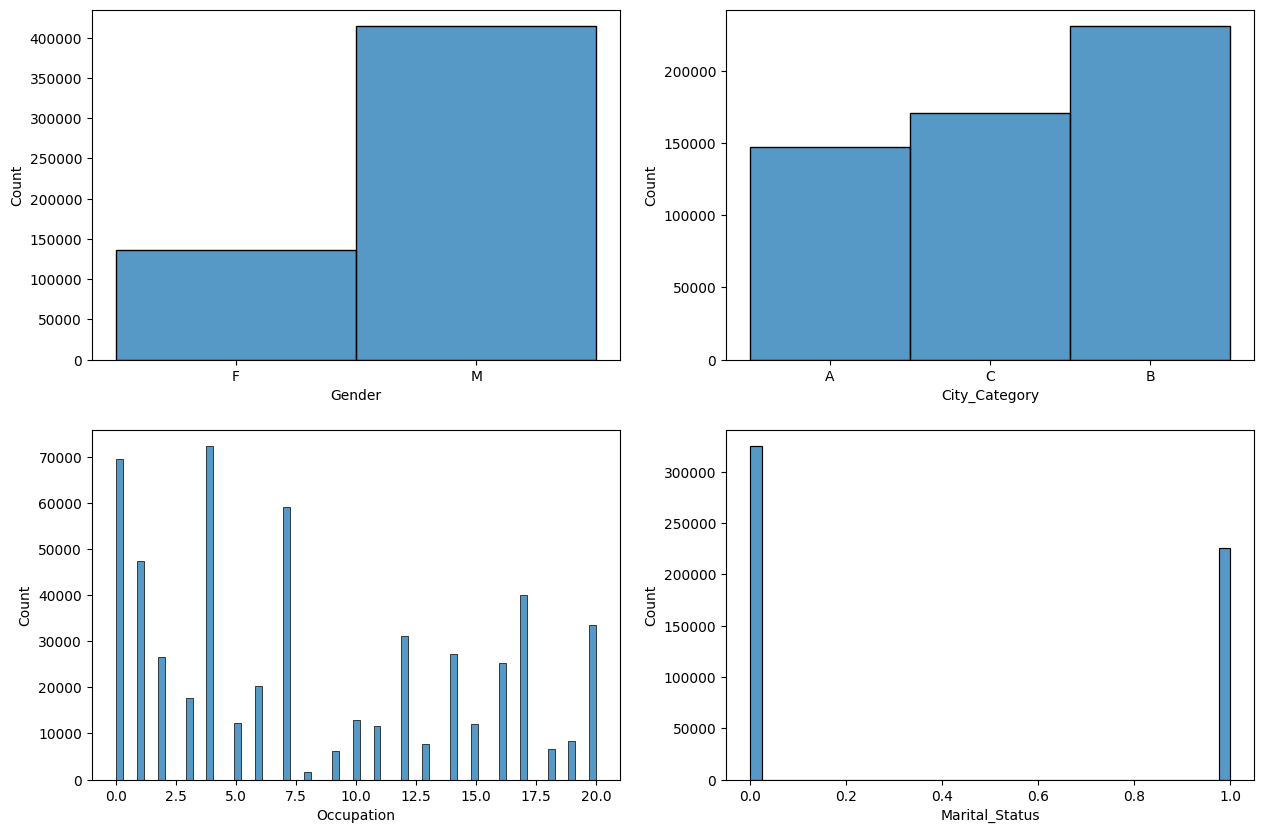

In [ ]:
fig , axis = plt.subplots(nrows=2,ncols=2, figsize=(15,10))
sns.histplot(data=df, x='Gender', stat = "count" , ax=axis[0,0])
sns.histplot(data=df, x='City_Category',ax=axis[0,1])
sns.histplot(data=df, x='Occupation',  ax=axis[1,0])
sns.histplot(data=df, x='Marital_Status',  ax=axis[1,1])
plt.show()

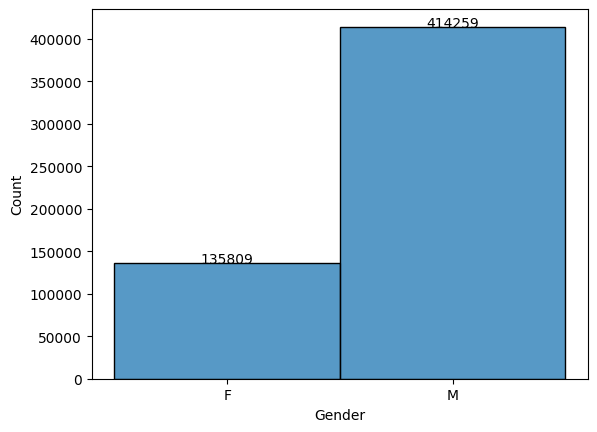

In [ ]:
# Gender histogra
sns.histplot(data=df, x='Gender', stat="count")
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()), ha="center")

Total count of males is 414295 and females is 135809.

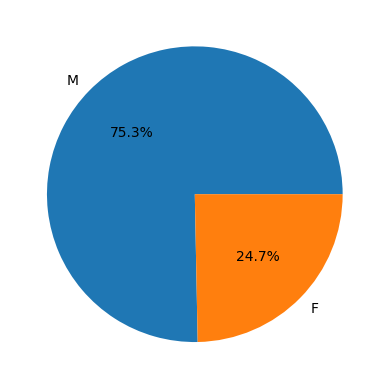

In [ ]:
plt.pie(df['Gender'].value_counts(), labels=df['Gender'].value_counts().index, autopct='%1.1f%%')
plt.show()

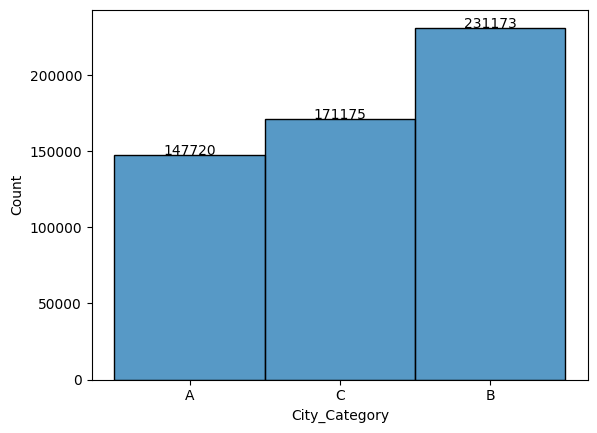

In [ ]:
# City_Category histogram
sns.histplot(data=df, x='City_Category', stat="count")
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()), ha="center")

Higest number of customer from city_category B (231173),followed by C (171175) and A (147720)

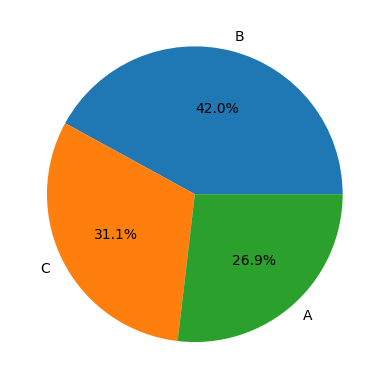

In [ ]:
plt.pie(df['City_Category'].value_counts(), labels=df['City_Category'].value_counts().index, autopct='%1.1f%%')
plt.show()

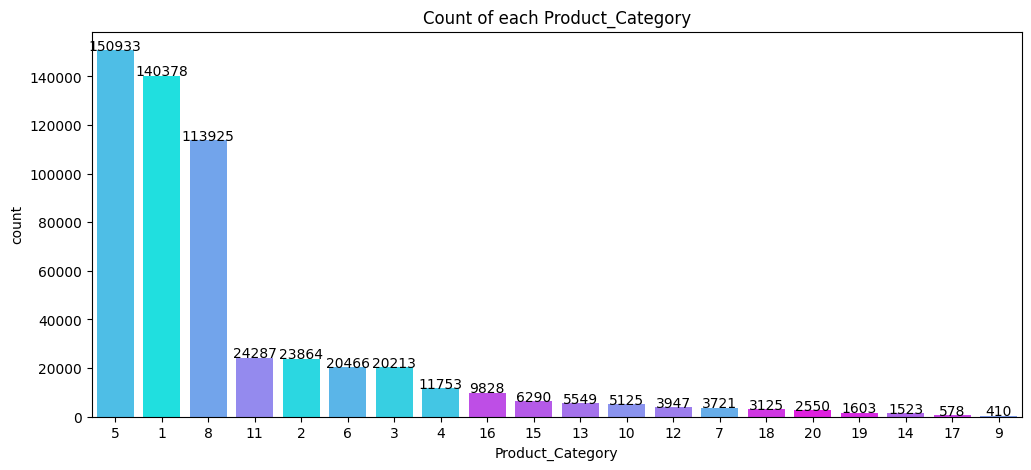

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x='Product_Category', data=df, palette='cool', hue='Product_Category', legend=False, order=df['Product_Category'].value_counts().index)
plt.xlabel('Product_Category')
plt.ylabel('count')
plt.title('Count of each Product_Category')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()), ha="center")

 The product categories 5, 1, and 8 have the highest purchase

## Outliers detection using BoxPlots:

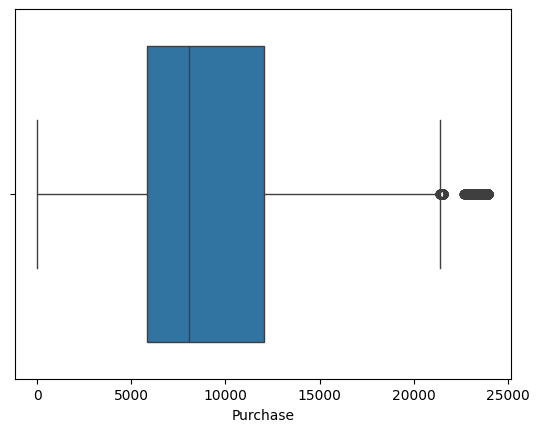

In [ ]:
# Before treating Outlires.
sns.boxplot(x=df['Purchase'])
plt.show()

Purchase column is only numerical column which contain some outlires.


In [ ]:
# using IQR method for detecting Outlires.

# calculating Q3 (75 percentile value)
Q3 = np.percentile(df['Purchase'],75)
print('Q3(75 percentile value):',Q3)

# calculating Q1 (25 percentile value)
Q1 = np.percentile(df['Purchase'],25)
print('Q1(25 percentile value):',Q1)

# calculating IQR
IQR = Q3 - Q1
print('IQR:',IQR)

# Calculating Upper and lower limit
upper_limit = Q3 + 1.5*IQR
print('Upper_limit:',upper_limit)
lower_limit = Q1 - 1.5*IQR
print('Lower_limit:',lower_limit)

# Finding Outlires.
outlires = df[(df['Purchase'] > upper_limit) | (df['Purchase'] < lower_limit)]
outlires_count = len(outlires)
print('Outlires:',outlires_count)

# Removing Outlires from data
df_without_outlires = df[(df['Purchase']<upper_limit)&(df['Purchase']>lower_limit)]



Q3(75 percentile value): 12054.0
Q1(25 percentile value): 5823.0
IQR: 6231.0
Upper_limit: 21400.5
Lower_limit: -3523.5
Outlires: 2677


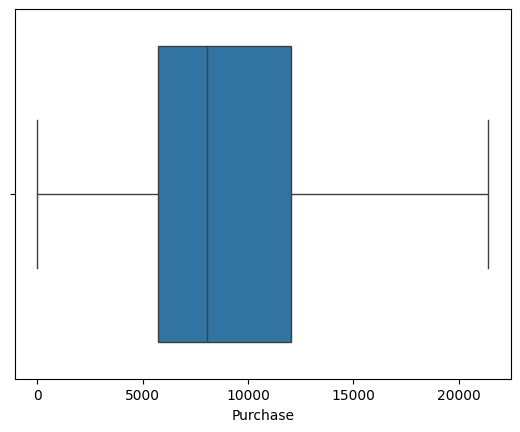

In [ ]:
# After treating outlires.
sns.boxplot(x=df_without_outlires['Purchase'])
plt.show()

In [ ]:
# Data befor removing outlires.
df.shape
print('Data befor removing outlires:',df.shape)

# Data after removing outlires.
df_without_outlires.shape
print('Data after removing outlires:',df_without_outlires.shape)


Data befor removing outlires: (550068, 10)
Data after removing outlires: (547391, 10)


 ## Bivariate Analysis:

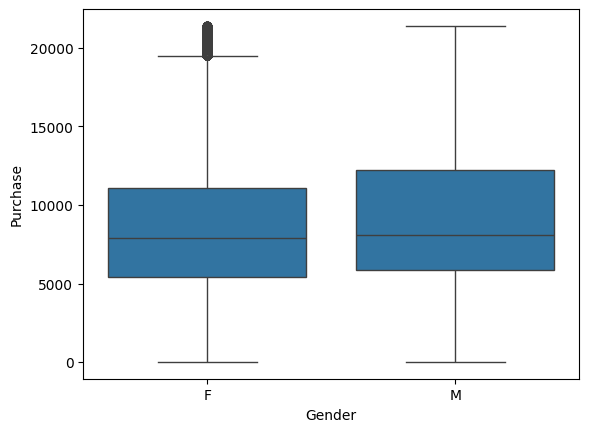

In [ ]:
# Gender vs Purchase.
sns.boxplot(x='Gender', y='Purchase', data=df_without_outlires)
plt.show()

Gender vs Purchase.

1. mean purchase of both male and female are approxmately equal.
2. max purchase value of male is slightly higher than female.
3. female have some outlires.

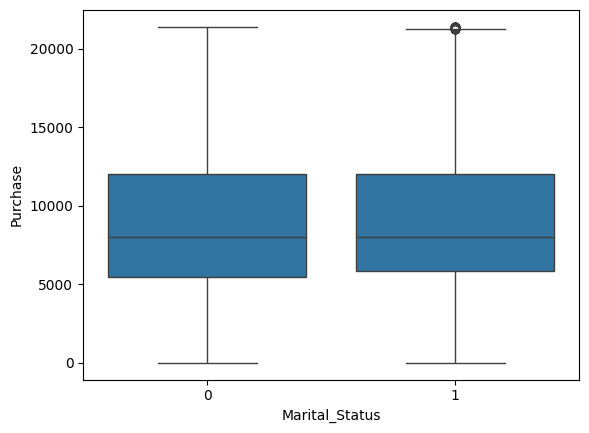

In [ ]:
# Martial_Status vs Purchase
sns.boxplot(x='Marital_Status', y='Purchase', data=df_without_outlires)
plt.show()

Martial_Status vs Purchase

1. median value of marital status is approxmitaly same.

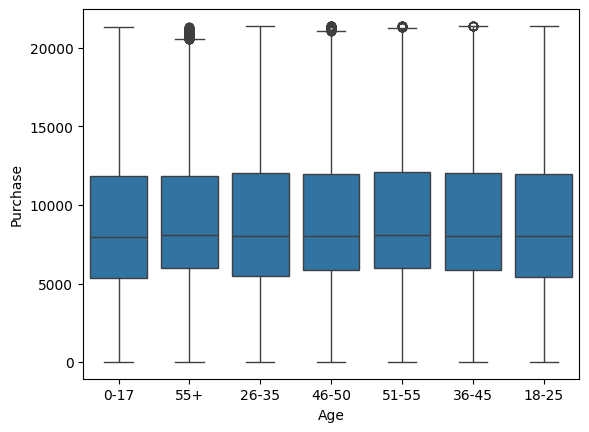

In [ ]:
# Age vs Purchase
sns.boxplot(x='Age',y='Purchase', data=df_without_outlires)
plt.show()

Age vs Purchase

1. mean value of purchase in all age group is almost same.
2. age group 55+, 46-50, 51-55, and 36-45 have some outlires.

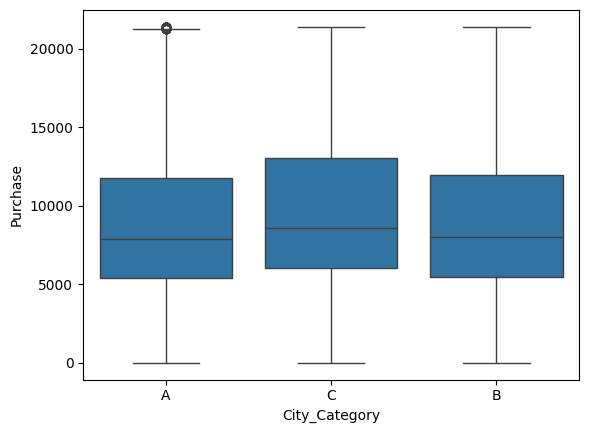

In [ ]:
# City_Category vs Purchase
sns.boxplot(x='City_Category',y='Purchase', data=df_without_outlires)
plt.show()

City_Category vs Purchase

1. mean value of city catagory C is slightely higher then B and A.

## Gender-Based Transaction Analysis

In [ ]:
df_without_outlires.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
# Avarage money spent by each customer
avg_pur = df_without_outlires['Purchase'].mean()
print('Avarage money spent by each customer:',avg_pur)

# Avarage money spent by each female
avg_f = df_without_outlires[df_without_outlires['Gender'] == 'F']['Purchase'].mean()
print('Avarage money spent by each female:',avg_f)

# Avarage money spent by each male
avg_m = df_without_outlires[df_without_outlires['Gender'] == 'M']['Purchase'].mean()
print('Avarage money spent by each male:',avg_m)

Avarage money spent by each customer: 9195.62719518589
Avarage money spent by each female: 8671.049038603756
Avarage money spent by each male: 9367.724354697444


1. Avarage money spent by each customer : 9195.62
2. Avarage money spent by each female : 8675
3. Avarage money spent by each male : 9367
4. Male spend more money them female.


In [ ]:
amt_df = df.groupby(['User_ID', 'Gender'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


In [ ]:
df_male = amt_df[amt_df['Gender']=='M']['Purchase'].mean()
df_female = amt_df[amt_df['Gender']=='F']['Purchase'].mean()

print("Average amount spend by Male customers: {:.2f}".format(df_male))
print("Average amount spend by Female customers: {:.2f}".format(df_female))

Average amount spend by Male customers: 925344.40
Average amount spend by Female customers: 712024.39


In [ ]:
# Male data
#df_male = df_without_outlires[df_without_outlires['Gender'] == 'M']

# female data
#df_female = df_without_outlires[df_without_outlires['Gender'] == 'F']

df_male: ()
df_female: ()


### Checking Confidence intervals and distribution of the mean of the expenses by female and male customers


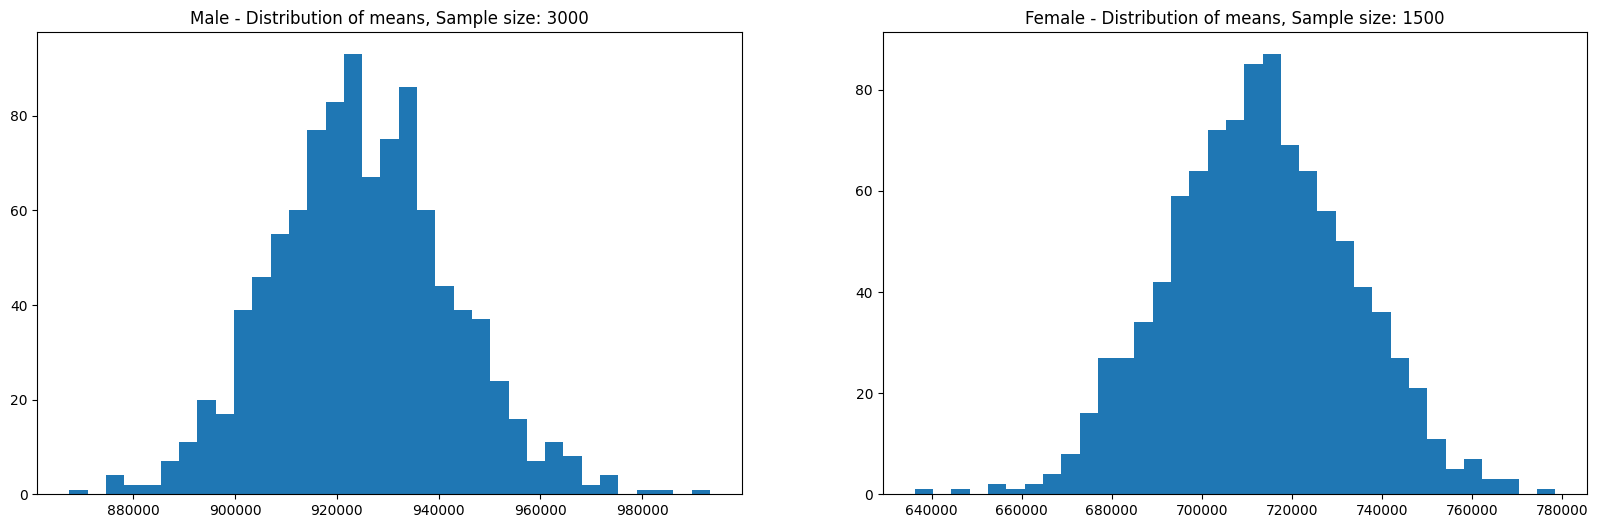

Population mean - Mean of sample means of amount spent for Male: 925047.29
Population mean - Mean of sample means of amount spent for Female: 712726.79

Male - Sample mean: 925344.40
Female - Sample mean: 712024.39
Male - Sample std: 985830.10
Female - Sample std: 807370.73


In [ ]:

# Parameters
male_sample_size = 3000
female_sample_size = 1500
num_repetitions = 1000

# Empty lists to store mean values
male_mean = []
female_mean = []

# Sampling and calculating mean
for i in range(num_repetitions):
    male_sample = amt_df[amt_df['Gender']=='M']['Purchase'].sample(male_sample_size, replace=True).mean()
    female_sample = amt_df[amt_df['Gender']=='F']['Purchase'].sample(female_sample_size, replace=True).mean()
    male_mean.append(male_sample)
    female_mean.append(female_sample)

# Plotting
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(male_mean, bins=35)
axis[1].hist(female_mean, bins=35)
axis[0].set_title("Male - Distribution of means, Sample size: 3000")
axis[1].set_title("Female - Distribution of means, Sample size: 1500")

plt.show()


# Calculate and print the mean of sample means
print("Population mean - Mean of sample means of amount spent for Male: {:.2f}".format(np.mean(male_mean)))
print("Population mean - Mean of sample means of amount spent for Female: {:.2f}".format(np.mean(female_mean)))

# Calculate and print the sample mean and sample standard deviation for both male and female groups
print("\nMale - Sample mean: {:.2f}".format(df_male)) # df_male already contains the mean
print("Female - Sample mean: {:.2f}".format(df_female)) # df_female already contains the mean

# To get the standard deviation, you'd need to recalculate it from the original amt_df DataFrame
male_std = amt_df[amt_df['Gender']=='M']['Purchase'].std()
female_std = amt_df[amt_df['Gender']=='F']['Purchase'].std()
print("Male - Sample std: {:.2f}".format(male_std))
print("Female - Sample std: {:.2f}".format(female_std))

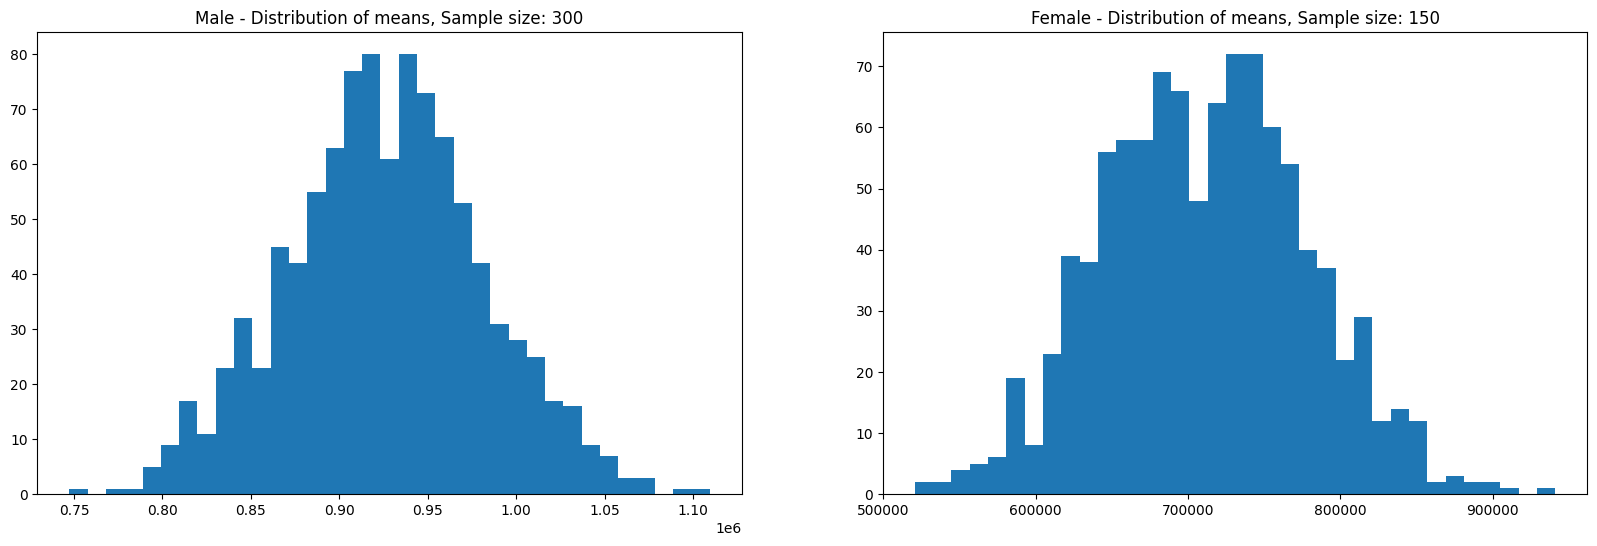

Population mean - Mean of sample means of amount spent for Male: 926124.25
Population mean - Mean of sample means of amount spent for Female: 711568.26

Male - Sample mean: 925344.40
Female - Sample mean: 712024.39
Male - Sample std: 985830.10
Female - Sample std: 807370.73


In [ ]:

# Parameters
male_sample_size = 300
female_sample_size = 150
num_repetitions = 1000

# Empty lists to store mean values
male_mean = []
female_mean = []

# Sampling and calculating mean
for i in range(num_repetitions):
    male_sample = amt_df[amt_df['Gender']=='M']['Purchase'].sample(male_sample_size, replace=True).mean()
    female_sample = amt_df[amt_df['Gender']=='F']['Purchase'].sample(female_sample_size, replace=True).mean()
    male_mean.append(male_sample)
    female_mean.append(female_sample)

# Plotting
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(male_mean, bins=35)
axis[1].hist(female_mean, bins=35)
axis[0].set_title("Male - Distribution of means, Sample size: 300")
axis[1].set_title("Female - Distribution of means, Sample size: 150")

plt.show()


# Calculate and print the mean of sample means
print("Population mean - Mean of sample means of amount spent for Male: {:.2f}".format(np.mean(male_mean)))
print("Population mean - Mean of sample means of amount spent for Female: {:.2f}".format(np.mean(female_mean)))

# Calculate and print the sample mean and sample standard deviation for both male and female groups
print("\nMale - Sample mean: {:.2f}".format(df_male)) # df_male already contains the mean
print("Female - Sample mean: {:.2f}".format(df_female)) # df_female already contains the mean

# To get the standard deviation, you'd need to recalculate it from the original amt_df DataFrame
male_std = amt_df[amt_df['Gender']=='M']['Purchase'].std()
female_std = amt_df[amt_df['Gender']=='F']['Purchase'].std()
print("Male - Sample std: {:.2f}".format(male_std))
print("Female - Sample std: {:.2f}".format(female_std))

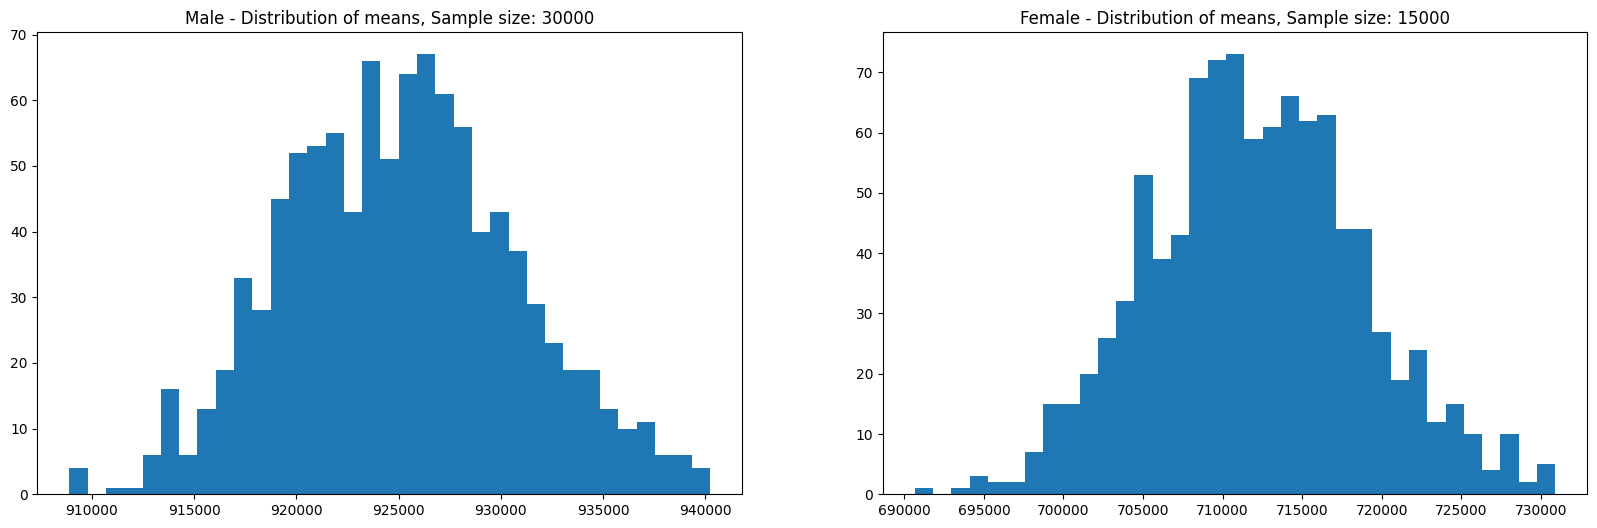

Population mean - Mean of sample means of amount spent for Male: 925092.50
Population mean - Mean of sample means of amount spent for Female: 712075.60

Male - Sample mean: 925344.40
Female - Sample mean: 712024.39
Male - Sample std: 985830.10
Female - Sample std: 807370.73


In [ ]:

# Parameters
male_sample_size = 30000
female_sample_size = 15000
num_repetitions = 1000

# Empty lists to store mean values
male_mean = []
female_mean = []

# Sampling and calculating mean
for i in range(num_repetitions):
    male_sample = amt_df[amt_df['Gender']=='M']['Purchase'].sample(male_sample_size, replace=True).mean()
    female_sample = amt_df[amt_df['Gender']=='F']['Purchase'].sample(female_sample_size, replace=True).mean()
    male_mean.append(male_sample)
    female_mean.append(female_sample)

# Plotting
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(male_mean, bins=35)
axis[1].hist(female_mean, bins=35)
axis[0].set_title("Male - Distribution of means, Sample size: 30000")
axis[1].set_title("Female - Distribution of means, Sample size: 15000")

plt.show()


# Calculate and print the mean of sample means
print("Population mean - Mean of sample means of amount spent for Male: {:.2f}".format(np.mean(male_mean)))
print("Population mean - Mean of sample means of amount spent for Female: {:.2f}".format(np.mean(female_mean)))

# Calculate and print the sample mean and sample standard deviation for both male and female groups
print("\nMale - Sample mean: {:.2f}".format(df_male)) # df_male already contains the mean
print("Female - Sample mean: {:.2f}".format(df_female)) # df_female already contains the mean

# To get the standard deviation, you'd need to recalculate it from the original amt_df DataFrame
male_std = amt_df[amt_df['Gender']=='M']['Purchase'].std()
female_std = amt_df[amt_df['Gender']=='F']['Purchase'].std()
print("Male - Sample std: {:.2f}".format(male_std))
print("Female - Sample std: {:.2f}".format(female_std))

For sample size 300, 3000, and 30000:

Population mean - Mean of sample means of amount spend for Male:

300 -> 924972.04

3000 -> 925321.16

30000 -> 925406.43

Population mean - Mean of sample means of amount spend for Female:

150 -> 712298.71

1500 -> 711995.61

15000 -> 711949.28

We can clearly observe that Mean of sample means for different sample sizes are almost the same.

## Checking confidence intervals of average male and female spending.

### 99% confidence interval.

In [ ]:
# Assuming male_mean and female_mean lists already contain the sample means
# Calculate 99% Confidence Interval for Male
male_mean_of_means = np.mean(male_mean)
male_std_of_means = np.std(male_mean, ddof=1)  # Sample standard deviation


from scipy.stats import norm
# Calculate the Z-score for 99% confidence level
confidence_level = 0.99
alpha = 1 - confidence_level
z_score = norm.ppf(1 - alpha / 2)

print("Z-score for 99% confidence level:", z_score)

# Confidence Interval for Male
male_margin_of_error = z_score * (male_std_of_means / np.sqrt(len(male_mean)))
male_confidence_interval = (male_mean_of_means - male_margin_of_error, male_mean_of_means + male_margin_of_error)

print("99% Confidence Interval for Male Mean of Sample Means: {:.2f} to {:.2f}".format(*male_confidence_interval))

# Calculate 99% Confidence Interval for Female
female_mean_of_means = np.mean(female_mean)
female_std_of_means = np.std(female_mean, ddof=1)  # Sample standard deviation

# Confidence Interval for Female
female_margin_of_error = z_score * (female_std_of_means / np.sqrt(len(female_mean)))
female_confidence_interval = (female_mean_of_means - female_margin_of_error, female_mean_of_means + female_margin_of_error)

print("99% Confidence Interval for Female Mean of Sample Means: {:.2f} to {:.2f}".format(*female_confidence_interval))


Z-score for 99% confidence level: 2.5758293035489004
99% Confidence Interval for Male Mean of Sample Means: 924631.85 to 925553.15
99% Confidence Interval for Female Mean of Sample Means: 711532.08 to 712619.12


## 95% confidence interval.

In [ ]:
# Assuming male_mean and female_mean lists already contain the sample means
# Calculate 95% Confidence Interval for Male
male_mean_of_means = np.mean(male_mean)
male_std_of_means = np.std(male_mean, ddof=1)  # Sample standard deviation


from scipy.stats import norm
# Calculate the Z-score for 99% confidence level
confidence_level = 0.95
alpha = 1 - confidence_level
z_score = norm.ppf(1 - alpha / 2)

print("Z-score for 95% confidence level:", z_score)

# Confidence Interval for Male
male_margin_of_error = z_score * (male_std_of_means / np.sqrt(len(male_mean)))
male_confidence_interval = (male_mean_of_means - male_margin_of_error, male_mean_of_means + male_margin_of_error)

print("99% Confidence Interval for Male Mean of Sample Means: {:.2f} to {:.2f}".format(*male_confidence_interval))

# Calculate 99% Confidence Interval for Female
female_mean_of_means = np.mean(female_mean)
female_std_of_means = np.std(female_mean, ddof=1)  # Sample standard deviation

# Confidence Interval for Female
female_margin_of_error = z_score * (female_std_of_means / np.sqrt(len(female_mean)))
female_confidence_interval = (female_mean_of_means - female_margin_of_error, female_mean_of_means + female_margin_of_error)

print("95% Confidence Interval for Female Mean of Sample Means: {:.2f} to {:.2f}".format(*female_confidence_interval))


Z-score for 95% confidence level: 1.959963984540054
99% Confidence Interval for Male Mean of Sample Means: 924741.99 to 925443.01
95% Confidence Interval for Female Mean of Sample Means: 711662.03 to 712489.16


## 90% confidence interval.

In [ ]:
# Assuming male_mean and female_mean lists already contain the sample means
# Calculate 90% Confidence Interval for Male
male_mean_of_means = np.mean(male_mean)
male_std_of_means = np.std(male_mean, ddof=1)  # Sample standard deviation


from scipy.stats import norm
# Calculate the Z-score for 99% confidence level
confidence_level = 0.90
alpha = 1 - confidence_level
z_score = norm.ppf(1 - alpha / 2)

print("Z-score for 90% confidence level:", z_score)

# Confidence Interval for Male
male_margin_of_error = z_score * (male_std_of_means / np.sqrt(len(male_mean)))
male_confidence_interval = (male_mean_of_means - male_margin_of_error, male_mean_of_means + male_margin_of_error)

print("90% Confidence Interval for Male Mean of Sample Means: {:.2f} to {:.2f}".format(*male_confidence_interval))

# Calculate 90% Confidence Interval for Female
female_mean_of_means = np.mean(female_mean)
female_std_of_means = np.std(female_mean, ddof=1)  # Sample standard deviation

# Confidence Interval for Female
female_margin_of_error = z_score * (female_std_of_means / np.sqrt(len(female_mean)))
female_confidence_interval = (female_mean_of_means - female_margin_of_error, female_mean_of_means + female_margin_of_error)

print("90% Confidence Interval for Female Mean of Sample Means: {:.2f} to {:.2f}".format(*female_confidence_interval))


Z-score for 90% confidence level: 1.6448536269514722
90% Confidence Interval for Male Mean of Sample Means: 924798.34 to 925386.66
90% Confidence Interval for Female Mean of Sample Means: 711728.52 to 712422.67


## Checking Marital_Status affect the amount spent

In [ ]:
df_without_outlires.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
amt_df = df_without_outlires.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df.head()

,User_ID,Marital_Status,Purchase
0,1000001,0,334093
1,1000002,0,810472
2,1000003,0,341635
3,1000004,1,206468
4,1000005,1,821001


In [ ]:
avg_amt_df = df_without_outlires['Marital_Status'].value_counts()
avg_amt_df.reset_index()

,Marital_Status,count
0,0,323242
1,1,224149


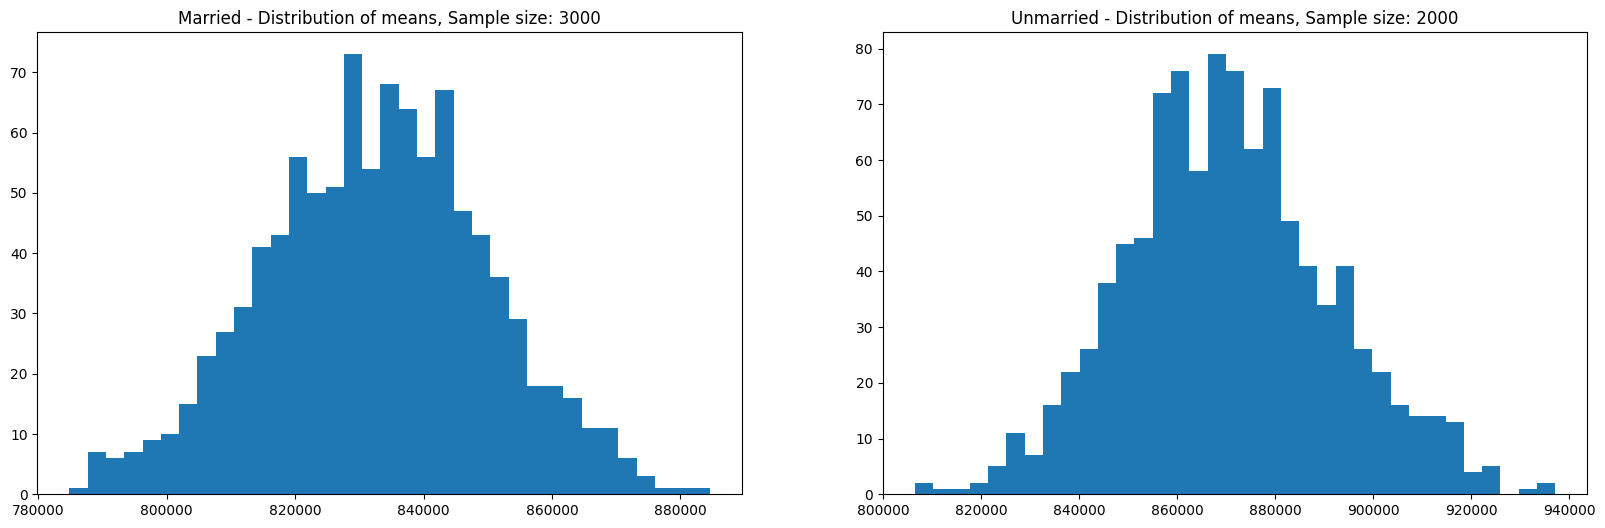

Population mean - Mean of sample means of amount spend for Married: 832644.12
Population mean - Mean of sample means of amount spend for Unmarried: 870448.39

Married - Sample mean: 832362.91 Sample std: 927078.73
Unmarried - Sample mean: 870452.95 Sample std: 940191.72


In [ ]:
# Parameters
marid_samp_size = 3000
unmarid_sample_size = 2000
num_repitions = 1000

# # Empty lists to store mean values
marid_means = []
unmarid_means = []

# Sampling and calculating mean
for _ in range(num_repitions):
    marid_mean = amt_df[amt_df['Marital_Status']==1].sample(marid_samp_size, replace=True)['Purchase'].mean()
    unmarid_mean = amt_df[amt_df['Marital_Status']==0].sample(unmarid_sample_size, replace=True)['Purchase'].mean()

    marid_means.append(marid_mean)
    unmarid_means.append(unmarid_mean)

# Plotting
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(marid_means, bins=35)
axis[1].hist(unmarid_means, bins=35)
axis[0].set_title("Married - Distribution of means, Sample size: 3000")
axis[1].set_title("Unmarried - Distribution of means, Sample size: 2000")

plt.show()

# Calculate and print the mean of sample means
print("Population mean - Mean of sample means of amount spend for Married: {:.2f}".format(np.mean(marid_means)))
print("Population mean - Mean of sample means of amount spend for Unmarried: {:.2f}".format(np.mean(unmarid_means)))

# Calculate and print the sample mean and sample standard deviation for both marid and unmarid groups
print("\nMarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==1]['Purchase'].mean(), amt_df[amt_df['Marital_Status']==1]['Purchase'].std()))
print("Unmarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==0]['Purchase'].mean(), amt_df[amt_df['Marital_Status']==0]['Purchase'].std()))

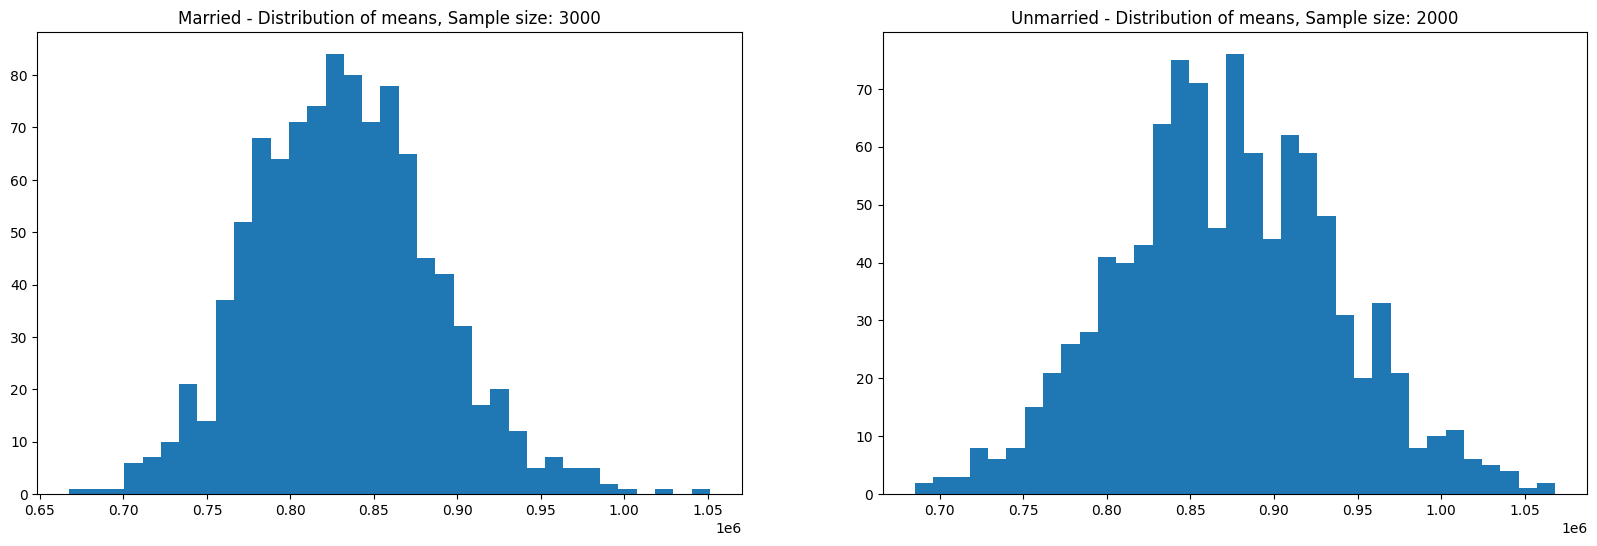

Population mean - Mean of sample means of amount spend for Married: 832388.28
Population mean - Mean of sample means of amount spend for Unmarried: 871437.43

Married - Sample mean: 832362.91 Sample std: 927078.73
Unmarried - Sample mean: 870452.95 Sample std: 940191.72


In [ ]:
# Parameters
marid_samp_size = 300
unmarid_sample_size = 200
num_repitions = 1000

# # Empty lists to store mean values
marid_means = []
unmarid_means = []

# Sampling and calculating mean
for _ in range(num_repitions):
    marid_mean = amt_df[amt_df['Marital_Status']==1].sample(marid_samp_size, replace=True)['Purchase'].mean()
    unmarid_mean = amt_df[amt_df['Marital_Status']==0].sample(unmarid_sample_size, replace=True)['Purchase'].mean()

    marid_means.append(marid_mean)
    unmarid_means.append(unmarid_mean)

# Plotting
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(marid_means, bins=35)
axis[1].hist(unmarid_means, bins=35)
axis[0].set_title("Married - Distribution of means, Sample size: 3000")
axis[1].set_title("Unmarried - Distribution of means, Sample size: 2000")

plt.show()

# Calculate and print the mean of sample means
print("Population mean - Mean of sample means of amount spend for Married: {:.2f}".format(np.mean(marid_means)))
print("Population mean - Mean of sample means of amount spend for Unmarried: {:.2f}".format(np.mean(unmarid_means)))

# Calculate and print the sample mean and sample standard deviation for both marid and unmarid groups
print("\nMarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==1]['Purchase'].mean(), amt_df[amt_df['Marital_Status']==1]['Purchase'].std()))
print("Unmarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==0]['Purchase'].mean(), amt_df[amt_df['Marital_Status']==0]['Purchase'].std()))

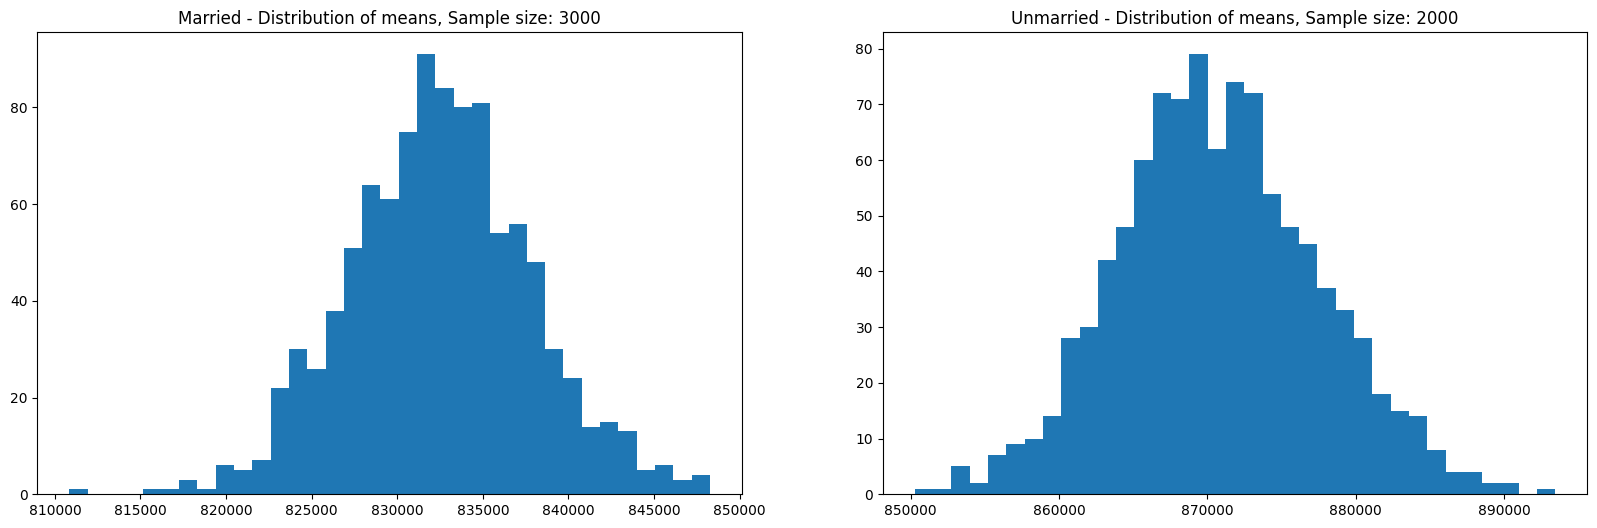

Population mean - Mean of sample means of amount spend for Married: 832487.86
Population mean - Mean of sample means of amount spend for Unmarried: 870730.34

Married - Sample mean: 832362.91 Sample std: 927078.73
Unmarried - Sample mean: 870452.95 Sample std: 940191.72


In [ ]:
# Parameters
marid_samp_size = 30000
unmarid_sample_size = 20000
num_repitions = 1000

# # Empty lists to store mean values
marid_means = []
unmarid_means = []

# Sampling and calculating mean
for _ in range(num_repitions):
    marid_mean = amt_df[amt_df['Marital_Status']==1].sample(marid_samp_size, replace=True)['Purchase'].mean()
    unmarid_mean = amt_df[amt_df['Marital_Status']==0].sample(unmarid_sample_size, replace=True)['Purchase'].mean()

    marid_means.append(marid_mean)
    unmarid_means.append(unmarid_mean)

# Plotting
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(marid_means, bins=35)
axis[1].hist(unmarid_means, bins=35)
axis[0].set_title("Married - Distribution of means, Sample size: 3000")
axis[1].set_title("Unmarried - Distribution of means, Sample size: 2000")

plt.show()

# Calculate and print the mean of sample means
print("Population mean - Mean of sample means of amount spend for Married: {:.2f}".format(np.mean(marid_means)))
print("Population mean - Mean of sample means of amount spend for Unmarried: {:.2f}".format(np.mean(unmarid_means)))

# Calculate and print the sample mean and sample standard deviation for both marid and unmarid groups
print("\nMarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==1]['Purchase'].mean(), amt_df[amt_df['Marital_Status']==1]['Purchase'].std()))
print("Unmarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==0]['Purchase'].mean(), amt_df[amt_df['Marital_Status']==0]['Purchase'].std()))

For sample size 300, 3000, and 30000:

Population mean - Mean of sample means of amount spend for Marid:

300 -> 829480.31

3000 -> 832146.76

30000 -> 832373.24

Population mean - Mean of sample means of amount spend for Unmarid:

200 -> 829480.31

2000 -> 870245.54

20000 -> 870225.21

We can clearly observe that Mean of sample means for different sample sizes are almost the same.

## Checking for confidence level.


In [ ]:
# Calculate 99% Confidence Interval for Marid
marid_mean_of_means = np.mean(marid_means)
marid_std_of_means = np.std(marid_means, ddof=1)  # Sample standard deviation


from scipy.stats import norm

# Calculate the Z-score for 99% confidence level
confidence_level = 0.99
alpha = 1 - confidence_level
z_score = norm.ppf(1 - alpha / 2)
print("Z-score for 99% confidence level:", z_score)


print("99% Confidence Interval:")
for val in ["Married", "Unmarried"]:

    new_val = 1 if val == "Married" else 0

    new_df = amt_df[amt_df['Marital_Status']==new_val]

    margin_of_error_clt =z_score*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("{} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

Z-score for 99% confidence level: 2.5758293035489004
99% Confidence Interval:
Married confidence interval of means: (784352.68, 880373.15)
Unmarried confidence interval of means: (829023.32, 911882.57)


In [ ]:
# Calculate 95% Confidence Interval for Marid
marid_mean_of_means = np.mean(marid_means)
marid_std_of_means = np.std(marid_means, ddof=1)  # Sample standard deviation


from scipy.stats import norm

# Calculate the Z-score for 95% confidence level
confidence_level = 0.95
alpha = 1 - confidence_level
z_score = norm.ppf(1 - alpha / 2)
print("Z-score for 95% confidence level:", z_score)


print("95% Confidence Interval:")
for val in ["Married", "Unmarried"]:

    new_val = 1 if val == "Married" else 0

    new_df = amt_df[amt_df['Marital_Status']==new_val]

    margin_of_error_clt =z_score*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("{} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))


Z-score for 95% confidence level: 1.959963984540054
95% Confidence Interval:
Married confidence interval of means: (795831.64, 868894.19)
Unmarried confidence interval of means: (838928.90, 901977.00)


In [ ]:
# Calculate 90% Confidence Interval for Marid
marid_mean_of_means = np.mean(marid_means)
marid_std_of_means = np.std(marid_means, ddof=1)  # Sample standard deviation


from scipy.stats import norm

# Calculate the Z-score for 95% confidence level
confidence_level = 0.95
alpha = 1 - confidence_level
z_score = norm.ppf(1 - alpha / 2)
print("Z-score for 90% confidence level:", z_score)


print("90% Confidence Interval:")
for val in ["Married", "Unmarried"]:

    new_val = 1 if val == "Married" else 0

    new_df = amt_df[amt_df['Marital_Status']==new_val]

    margin_of_error_clt =z_score*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("{} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))


Z-score for 90% confidence level: 1.959963984540054
90% Confidence Interval:
Married confidence interval of means: (795831.64, 868894.19)
Unmarried confidence interval of means: (838928.90, 901977.00)


99%, 95%, and 99% Confidence Interval of marrid and unmarrid customers data are overlaping.


## How Age affect the amount spent?


In [ ]:
amt_df = df_without_outlires.groupby(['User_ID', 'Age'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df.head(10)

,User_ID,Age,Purchase
0,1000001,0-17,334093
1,1000002,55+,810472
2,1000003,26-35,341635
3,1000004,46-50,206468
4,1000005,26-35,821001
5,1000006,51-55,379930
6,1000007,36-45,234668
7,1000008,26-35,796593
8,1000009,26-35,594099
9,1000010,36-45,2169510


In [ ]:
amt_df['Age'].value_counts()

,count
Age,
26-35,2053
36-45,1167
18-25,1069
46-50,531
51-55,481
55+,372
0-17,218


In [ ]:
from collections import defaultdict

# Group data by User_ID and Age, summing purchases for each combination
amt_df = df_without_outlires.groupby(['User_ID', 'Age'])[['Purchase']].sum()

# Define parameters
sample_size = 300
num_repitions = 1000

# Initialize a defaultdict for storing means
all_means = defaultdict(list)
age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']

# Calculate sample means for each age interval
for age_interval in age_intervals:
    # Access 'Age' from the index using .loc
    age_group_data = amt_df.loc[amt_df.index.get_level_values('Age') == age_interval]
    for _ in range(num_repitions):
        mean = age_group_data['Purchase'].sample(sample_size, replace=True).mean()
        all_means[age_interval].append(mean)

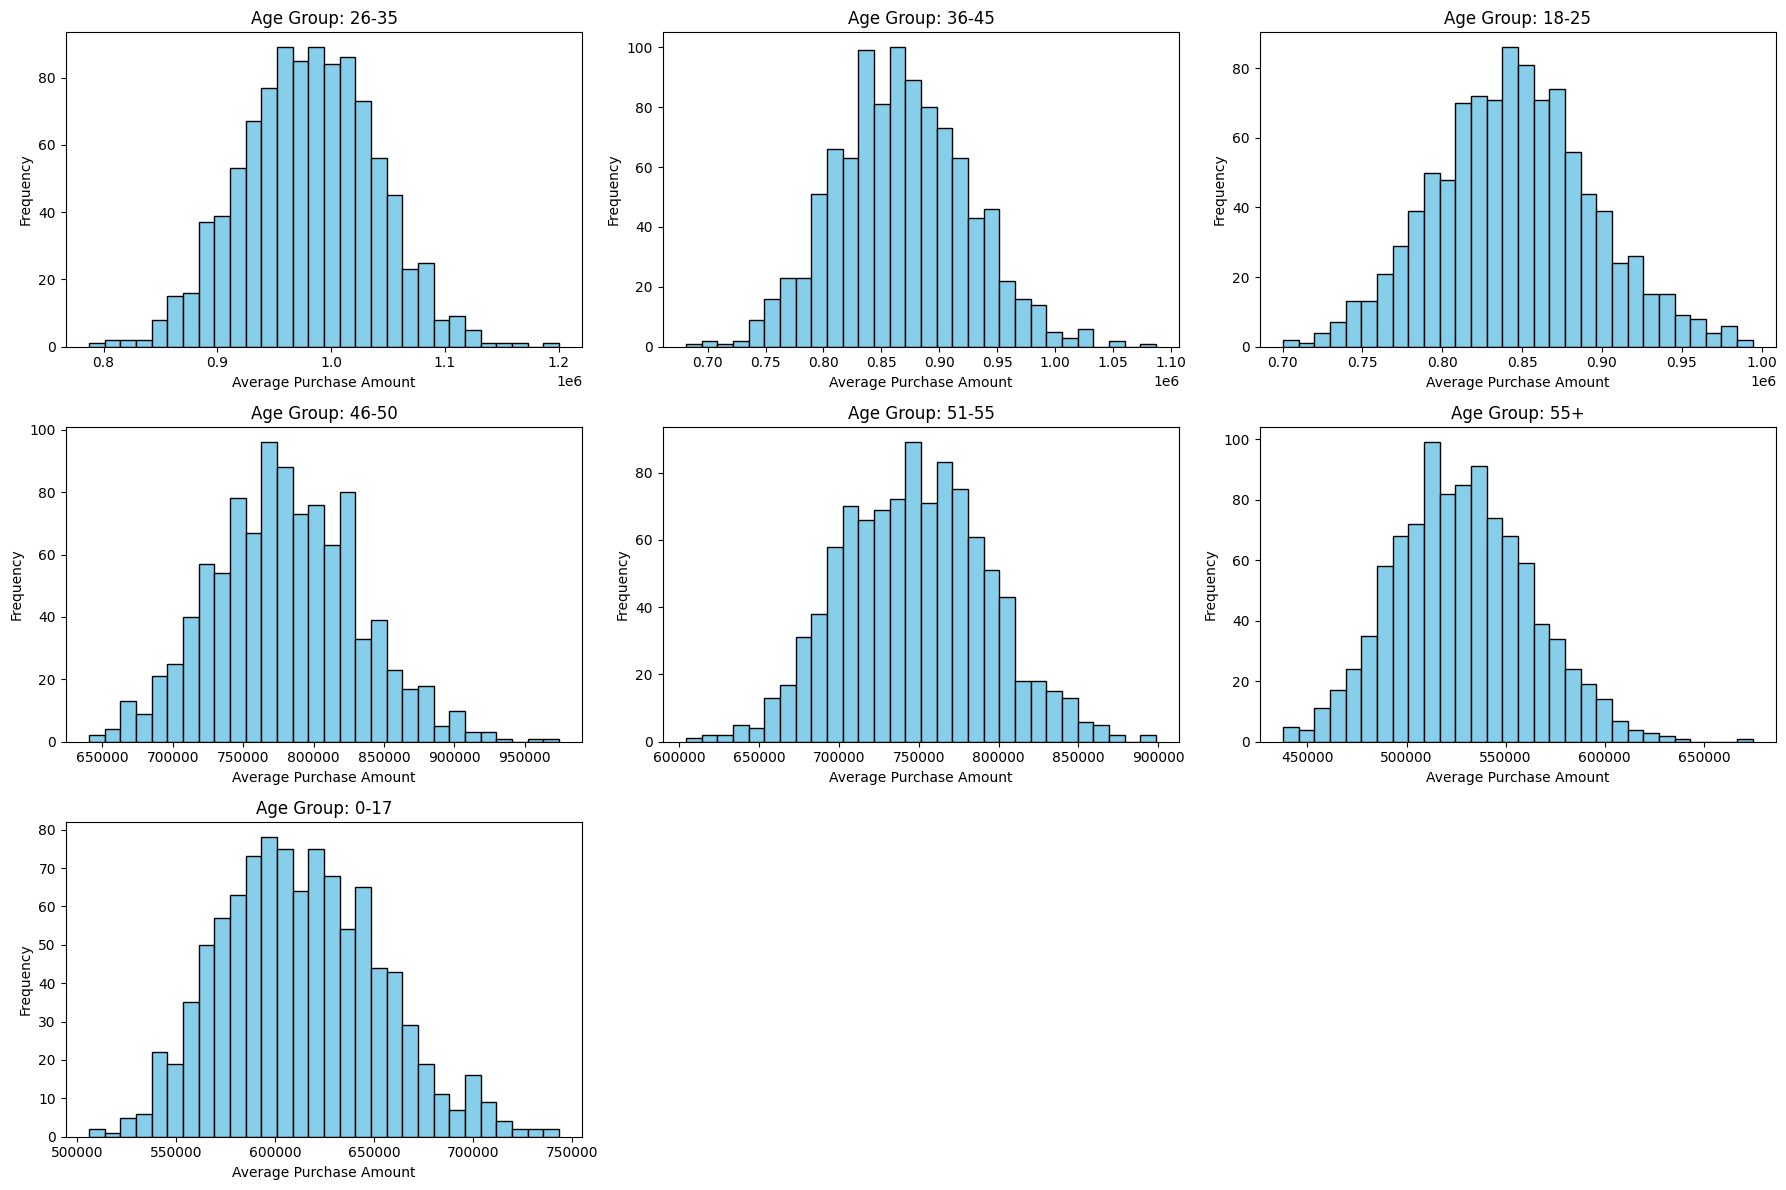

In [ ]:

# Set up the plot area with subplots for each age group
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axes = axes.flatten()  # Flatten to easily iterate over

# Plot histogram for each age group
for i, (age_interval, means) in enumerate(all_means.items()):
    axes[i].hist(means, bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Age Group: {age_interval}')
    axes[i].set_xlabel('Average Purchase Amount')
    axes[i].set_ylabel('Frequency')

# Hide any extra subplots if there are more than required
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
z_score = norm.ppf(0.99)
print(z_score)

2.3263478740408408


In [ ]:
# Z-score for 99% confidence level
z_score = norm.ppf(0.99)  # Using 0.995 since 99% confidence interval is two-tailed

# Loop through each age group to calculate the 99% confidence interval
for age_interval, means in all_means.items():
    # Calculate the mean and standard deviation of the sample means for this age group
    mean_of_means = np.mean(means)
    std_of_means = np.std(means, ddof=1)  # Use sample standard deviation

    # Calculate the margin of error
    margin_of_error = z_score * (std_of_means / np.sqrt(len(means)))

    # Calculate the confidence interval
    lower_limit = mean_of_means - margin_of_error
    upper_limit = mean_of_means + margin_of_error

    print(f"{age_interval} - 99% Confidence Interval: ({lower_limit:.2f}, {upper_limit:.2f})")


26-35 - 99% Confidence Interval: (976145.40, 984769.25)
36-45 - 99% Confidence Interval: (863159.20, 871633.99)
18-25 - 99% Confidence Interval: (841437.49, 848756.01)
46-50 - 99% Confidence Interval: (776183.75, 783813.31)
51-55 - 99% Confidence Interval: (744185.67, 750955.26)
55+ - 99% Confidence Interval: (525650.68, 530741.39)
0-17 - 99% Confidence Interval: (610139.77, 616004.53)


In [ ]:
# Z-score for 95% confidence level
z_score = norm.ppf(0.975)  # Using 0.995 since 99% confidence interval is two-tailed

# Loop through each age group to calculate the 99% confidence interval
for age_interval, means in all_means.items():
    # Calculate the mean and standard deviation of the sample means for this age group
    mean_of_means = np.mean(means)
    std_of_means = np.std(means, ddof=1)  # Use sample standard deviation

    # Calculate the margin of error
    margin_of_error = z_score * (std_of_means / np.sqrt(len(means)))

    # Calculate the confidence interval
    lower_limit = mean_of_means - margin_of_error
    upper_limit = mean_of_means + margin_of_error

    print(f"{age_interval} - 95% Confidence Interval: ({lower_limit:.2f}, {upper_limit:.2f})")


26-35 - 95% Confidence Interval: (976824.50, 984090.15)
36-45 - 95% Confidence Interval: (863826.56, 870966.63)
18-25 - 95% Confidence Interval: (842013.79, 848179.71)
46-50 - 95% Confidence Interval: (776784.56, 783212.51)
51-55 - 95% Confidence Interval: (744718.75, 750422.18)
55+ - 95% Confidence Interval: (526051.55, 530340.51)
0-17 - 95% Confidence Interval: (610601.60, 615542.70)


In [ ]:
# Z-score for 90% confidence level
z_score = norm.ppf(0.95)  # Using 0.995 since 99% confidence interval is two-tailed

# Loop through each age group to calculate the 99% confidence interval
for age_interval, means in all_means.items():
    # Calculate the mean and standard deviation of the sample means for this age group
    mean_of_means = np.mean(means)
    std_of_means = np.std(means, ddof=1)  # Use sample standard deviation

    # Calculate the margin of error
    margin_of_error = z_score * (std_of_means / np.sqrt(len(means)))

    # Calculate the confidence interval
    lower_limit = mean_of_means - margin_of_error
    upper_limit = mean_of_means + margin_of_error

    print(f"{age_interval} - 95% Confidence Interval: ({lower_limit:.2f}, {upper_limit:.2f})")


26-35 - 95% Confidence Interval: (977408.56, 983506.09)
36-45 - 95% Confidence Interval: (864400.53, 870392.66)
18-25 - 95% Confidence Interval: (842509.45, 847684.05)
46-50 - 95% Confidence Interval: (777301.28, 782695.79)
51-55 - 95% Confidence Interval: (745177.23, 749963.70)
55+ - 95% Confidence Interval: (526396.33, 529995.74)
0-17 - 95% Confidence Interval: (610998.80, 615145.50)


### Confidence Intervals

**Gender-Wise:** Using the Central Limit Theorem:
1.	The average amount spent by male customers is 925344.40
2.	The average amount spent by female customers is 712024.39

For a 99% Confidence Interval:

•	We can estimate that, 99% of the time:

o	The average amount spent by male customers will be between 924631.85 to 925553.15

o	The average amount spent by female customers will be between 711532.08 to 712619.12

**Marital Status-Wise:** Using the Central Limit Theorem:

1.	The average amount spent by married customers is 832644.12
2.	The average amount spent by unmarried customers is 870448.39

For a 99% Confidence Interval:

•	While the confidence intervals for married and unmarried customers overlap, the overlap is noticeably reduced.

o	The average amount spent by married customers will lie between 784,352.68 and 880,373.15.

o	The average amount spent by unmarried customers will lie between 829,023.32 and 911,882.57.

**Age-Wise** (99% Confidence Interval):

1.	Age 26-35: (973,422.17, 983,945.96)
2.	Age 36-45: (865,476.76, 875,591.71)
3.	Age 18-25: (839,048.97, 848,180.50)
4.	Age 46-50: (774,367.04, 784,366.19)
5.	Age 51-55: (743,802.44, 751,872.59)
6.	Age 55+: (524,263.09, 530,526.91)
7.	Age 0-17: (611,101.04, 618,088.49)


## **Recommendations**

1.	Gender-Focused Strategy

*	Observation: Men tend to spend more than women.

*	Recommendation: Focus on retaining existing male customers and attracting new male customers through targeted marketing campaigns and offers.

2.	Product Category Optimization

*	Observation: Product categories 1, 5, 8, and 11 have the highest purchase frequency and are popular with customers.

*	Recommendation: Increase promotion and stock availability of these high-demand products. Additionally, explore ways to stimulate interest in less-purchased product categories through discounts or bundled offers.

3.	Marital Status Approach

*	Observation: Unmarried customers have higher average spending compared to married customers.

*	Recommendation: Design campaigns specifically targeting unmarried customers with tailored offers, loyalty programs, or special events to drive engagement and spending.

4.	Targeting Age Demographics

*	Observation: Customers aged 18-45 contribute a significant share of total spending.

*	Recommendation: Focus marketing and customer acquisition efforts on this age group, possibly with products or promotions that align with their interests and spending patterns.

5.	City Category Strategy

*	Observation: Male customers in City_Category C demonstrate higher spending than those in City_Categories B or A.

*	Recommendation: Increase the product offerings and advertising budget in City_Category C to capture this higher-spending segment more effectively.

6.	Boosting Female Engagement

*	Observation: While male spending is higher, female customers still represent a substantial market share.

*	Recommendation: Develop personalized offers and campaigns that cater to female shopping preferences, especially around high-traffic shopping events.

7.	Enhance Digital Experience Across Key Age Groups

*	Observation: With significant spending coming from younger demographics, especially 18-45.

*	Recommendation: Ensure a seamless digital shopping experience and targeted online promotions, as younger customers may respond better to digital engagement.

8.	Marital Status-Based Promotions

*	Observation: Unmarried customers tend to spend more than married customers.

*	Recommendation: Create promotional offers that appeal to singles, such as social event partnerships or experience-based rewards, which could increase brand affinity and sales.

9.	Personalization for High-Purchase Categories

*	Observation: High-demand product categories (1, 5, 8, 11) are preferred.

*	Recommendation: Implement personalized recommendations for these categories on the website and app, encouraging repeat purchases with tailored suggestions based on previous buying behavior.
